## Data Wranging - WeRateDogs

- Data Gathering
- Accessment
- Data Cleaning

### Data Gathering

In [157]:
import requests as r
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [158]:
# Read twitter-archive file downloaded manually from udacity server into a dataframe
archive_df = pd.read_csv('twitter-archive-enhanced.csv')


In [159]:
# Download the image prediction data from udacity sever
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = r.get(url)

In [160]:
# save the response content to a file caled image_prediction 
with open('image_prediction', 'wb') as file:
    file.write(response.content)

In [161]:
# Read the image prediction file into a dataframe
image_df = pd.read_csv('image_prediction',  sep= '\t')


In [162]:
# Read the tweet-json.txt file line by line from the udacity server
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()


In [163]:
id_list = []
retweet_list = []
fav_list = []

for line in lines:
    line_json = json.loads(line)
    id_list.append(line_json['id_str'])
    retweet_list.append(line_json['retweet_count'])
    fav_list.append(line_json['favorite_count'])

In [164]:
print(len(id_list), len(retweet_list), len(fav_list))

2354 2354 2354


In [165]:
# Creating the tweet_df dataframe
tweet_dic = {
    'tweet_id': id_list,
    'retweet_count':retweet_list,
    'favorite_count': fav_list
}
tweet_df = pd.DataFrame.from_dict(tweet_dic)

### Accessing the data

In [166]:
# Visually inspecting the data

archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [167]:
archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [168]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [169]:
image_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [170]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [171]:
tweet_df.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [172]:
# Programmatic Inspection

In [173]:
archive_df.shape

(2356, 17)

In [174]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [175]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [176]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [177]:
archive_df.duplicated().sum()

0

In [178]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [179]:
archive_df.expanded_urls.unique()

array(['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
       'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
       'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
       ...,
       'https://twitter.com/dog_rates/status/666033412701032449/photo/1',
       'https://twitter.com/dog_rates/status/666029285002620928/photo/1',
       'https://twitter.com/dog_rates/status/666020888022790149/photo/1'],
      dtype=object)

In [180]:
archive_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [181]:
# Assessing the image data

In [182]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [183]:
image_df.shape

(2075, 12)

In [184]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [185]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [186]:
image_df.duplicated().sum()

0

In [187]:
image_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [188]:
# Assessing the tweet dataframe

In [189]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [190]:
tweet_df.shape

(2354, 3)

In [191]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [192]:
tweet_df.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [193]:
tweet_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [194]:
tweet_df.duplicated().sum()

0

### Quality Issues

* The archive dataframe has missing values
* Some columns are not having the right datatype: Timestamp should be changed from integers to datetime and Tweet_id should be strings.
* The data contains retweet columns that aren't needed for the study
* Incorrect dog names like 'a', 'an', 'the', 'such', etc.
* The source column should be renamed.
* Denominator ratings have multiple values
* Some of the numerator ratings are wrong and supposed to be a float.
* Some rows do not have images
* Retweet and favorite count should be integers not floats



### Structural Issues
* Pupper, floofer, doggo and puppo should be in one column
* All  dataframes should be merged to one.

### Data Cleaning

In [195]:
# Copy each dataframe

archive_cleaning = archive_df.copy()
image_cleaning = image_df.copy()
tweet_cleaning = tweet_df.copy()

We deal with the structural issues before quality issues

### Structural Issues

#### Define

* Pupper, floofer, doggo and puppo should be merged into one column called dog_stage then delete them.


#### Code

In [196]:
archive_cleaning['dog_stage'] = archive_cleaning.doggo + ' ' + archive_cleaning.floofer + ' ' + archive_cleaning.pupper + ' ' + archive_cleaning.puppo
archive_cleaning.dog_stage = archive_cleaning.dog_stage.str.replace('None', ' ',)
archive_cleaning.dog_stage = archive_cleaning.dog_stage.str.strip()
archive_cleaning.dog_stage[archive_cleaning.dog_stage == ''] = archive_cleaning.dog_stage.str.replace('', 'None')
archive_cleaning.dog_stage = archive_cleaning.dog_stage.str.replace('\s+', '/')

<ipython-input-196-233d71bbc4e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_cleaning.dog_stage[archive_cleaning.dog_stage == ''] = archive_cleaning.dog_stage.str.replace('', 'None')


In [197]:
archive_cleaning.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [198]:
archive_cleaning.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

#### Define

* Merge the archive_cleaning, image_cleaning and tweet_cleaning dataframes together.


#### Code

In [199]:
merged_df = archive_cleaning.merge(image_cleaning, how ='outer', on = 'tweet_id')
merged_df.tweet_id = merged_df.tweet_id.astype(str)
merged_df = merged_df.merge(tweet_cleaning, how='outer', on= 'tweet_id')

#### Test

In [200]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   2356 

### Quality Issues

#### Define

* Drop retweet observations


In [201]:
# The rows containing non null values for retweeted_status_id are retweet observations. 

merged_df = merged_df[merged_df.retweeted_status_id.isnull()]

In [202]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  dog_stage                   2175 

In [203]:
merged_df.isnull().mean() * 100

tweet_id                        0.000000
in_reply_to_status_id          96.413793
in_reply_to_user_id            96.413793
timestamp                       0.000000
source                          0.000000
text                            0.000000
retweeted_status_id           100.000000
retweeted_status_user_id      100.000000
retweeted_status_timestamp    100.000000
expanded_urls                   2.666667
rating_numerator                0.000000
rating_denominator              0.000000
name                            0.000000
dog_stage                       0.000000
jpg_url                         8.321839
img_num                         8.321839
p1                              8.321839
p1_conf                         8.321839
p1_dog                          8.321839
p2                              8.321839
p2_conf                         8.321839
p2_dog                          8.321839
p3                              8.321839
p3_conf                         8.321839
p3_dog          

#### Define

* Dropping columns with high null values.

#### Code

In [204]:
merged_df.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [205]:
removed = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
for i in removed:
    assert i not in  merged_df.columns

#### Define
* Rename the values in the source column.

#### Code

In [206]:
new_dict = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'iPhone',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Web Client',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'}

In [207]:
merged_df.source = merged_df.source.map(new_dict)

#### Test

In [208]:
merged_df.source.unique()

array(['iPhone', 'Web Client', 'Vine', 'TweetDeck'], dtype=object)

#### Define
* Converting Timestamp from Integer to Datetime

#### Code

In [209]:
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])

#### Test

In [210]:
merged_df.timestamp.dtype

datetime64[ns, UTC]

#### Define
* Convert incorrect names to None

#### Code

In [211]:
# All incorrect names starts with lowercase
merged_df.name[merged_df.name.str.islower()] = merged_df.name[merged_df.name.str.islower()].replace(r'^[a-z]+', 'None', regex= True)

<ipython-input-211-ae2a0103a21b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.name[merged_df.name.str.islower()] = merged_df.name[merged_df.name.str.islower()].replace(r'^[a-z]+', 'None', regex= True)


#### Test

In [212]:
merged_df.name[merged_df.name.str.islower()].count()

0

#### Define
* There are multiple Denominator ratings.

#### Code

In [213]:
# Drop all rows with rating_denominator other than 10
merged_df = merged_df[merged_df.rating_denominator == 10]

#### Test

In [214]:
merged_df.rating_denominator.value_counts()

10    2153
Name: rating_denominator, dtype: int64

#### Define
* Some of the numerator ratings are wrong and supposed to ba a float.

#### Code

In [215]:
merged_df['extract'] = merged_df.text.str.extract(r"([0-9]+[.][0-9]+/[0-9]+)")

In [216]:
merged_df.extract.unique()

array([nan, '13.5/10', '9.75/10', '11.27/10', '9.5/10', '11.26/10'],
      dtype=object)

In [217]:
merged_df.rating_numerator = merged_df.rating_numerator.astype(float)

In [218]:
wrong_index = list(merged_df[merged_df['extract'].isnull()==False].index)
for i in wrong_index:
    merged_df.rating_numerator[i] = float(merged_df.extract[i][:-3])

<ipython-input-218-6d1bc75994da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.rating_numerator[i] = float(merged_df.extract[i][:-3])


In [219]:
merged_df.drop(columns='extract', inplace= True)

#### Test

In [220]:
for i in wrong_index:
    print(merged_df.rating_numerator[i])

13.5
9.75
11.27
9.5
11.26


#### Define
* Drop unwanted columns

#### Code

In [221]:
merged_df.drop(columns=['expanded_urls', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'rating_denominator'], inplace= True)

#### Test

In [222]:
removed = ['expanded_urls', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
for i in removed:
    assert i not in merged_df.columns

#### Define
* Drop rows without images

#### Code

In [223]:
merged_df = merged_df[merged_df.jpg_url.notnull()]

#### Test

In [224]:
merged_df.isnull().sum()

tweet_id            0
timestamp           0
source              0
text                0
rating_numerator    0
name                0
dog_stage           0
jpg_url             0
img_num             0
retweet_count       0
favorite_count      0
dtype: int64

#### Define
* Convert retweet_count and favorite_count from float to integers.

#### Code

In [225]:
merged_df.retweet_count = merged_df.retweet_count.astype(int)
merged_df.favorite_count = merged_df.favorite_count.astype(int)

#### Test

In [226]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1976 non-null   object             
 1   timestamp         1976 non-null   datetime64[ns, UTC]
 2   source            1976 non-null   object             
 3   text              1976 non-null   object             
 4   rating_numerator  1976 non-null   float64            
 5   name              1976 non-null   object             
 6   dog_stage         1976 non-null   object             
 7   jpg_url           1976 non-null   object             
 8   img_num           1976 non-null   float64            
 9   retweet_count     1976 non-null   int32              
 10  favorite_count    1976 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(2), int32(2), object(6)
memory usage: 169.8+ KB


### Storing the data

In [227]:
merged_df.to_csv('twitter_archive_master.csv')

## Analysis and Visualization

In [228]:
merged_df.head()

,tweet_id,timestamp,source,text,rating_numerator,name,dog_stage,jpg_url,img_num,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,13.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,13.0,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,12.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,9774,41048


<AxesSubplot:xlabel='rating_numerator'>

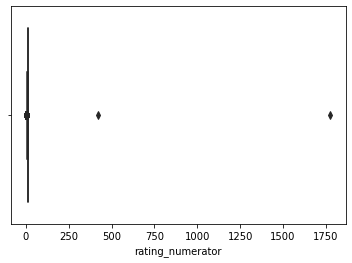

In [229]:
sns.boxplot(data= merged_df, x = 'rating_numerator')

The rating_numerator is greatly affected by outlier. So we remove outlier and replot

In [230]:
merged_df = merged_df[merged_df.rating_numerator < 30.0]

<AxesSubplot:xlabel='rating_numerator'>

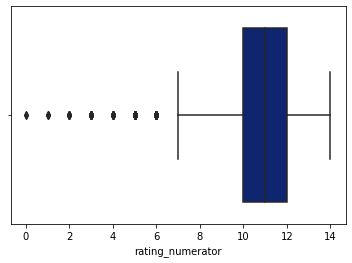

In [231]:
sns.boxplot(data= merged_df, x = 'rating_numerator')

[Text(0.5, 1.0, 'Favorite count vs Retweet count')]

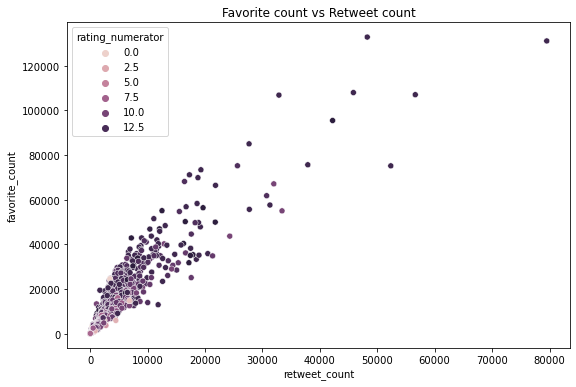

In [232]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=merged_df, x = 'retweet_count', y = 'favorite_count', hue='rating_numerator').set(title = 'Favorite count vs Retweet count')

[Text(0.5, 1.0, 'Tweet source against count')]

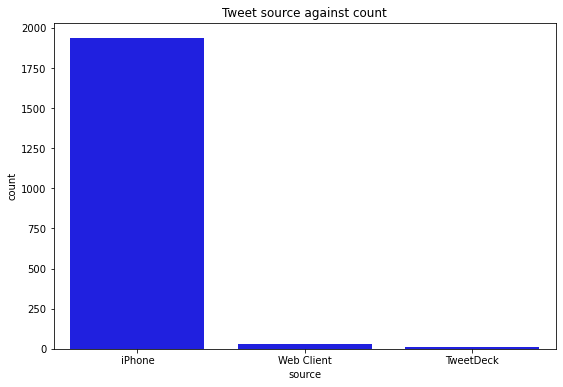

In [233]:
plt.figure(figsize=(9,6))
sns.set_palette('dark')
sns.countplot(data= merged_df, x= 'source', color= 'b').set(title='Tweet source against count')